In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.16.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#   Cargar datos

(60000, 28, 28)


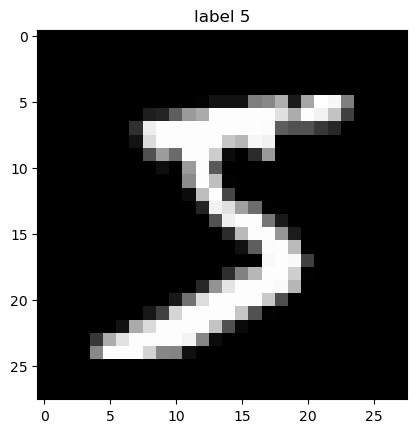

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

plt.imshow(x_train[0], cmap='gray')
plt.title("label {}".format(y_train[0]))

x_train = x_train.astype('float32') / np.max(x_train)
x_test = x_test.astype('float32') / np.max(x_test)


#up-scaling to 32
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), mode='constant')
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), mode='constant')
x_train = x_train[..., np.newaxis]           # (60000, 32, 32, 1)
x_test  = x_test[..., np.newaxis]            # (10000, 32, 32, 1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=(32, 32,1)),
        keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'), # esto 16 canales con 3 x 3
        keras.layers.MaxPooling2D((2, 2)), # -> me lleva a 16 x 16
        keras.layers.Flatten(), # en este momento tengo (None, 16 * 16 * 16)
        keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

/opt/miniconda3/envs/tf_m1_216/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-11-14 09:44:56.981762: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-14 09:44:56.981785: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-14 09:44:56.981789: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-11-14 09:44:56.982174: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-14 09:44:56.982188: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefine

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,130 (160.66 KB)

 Trainable params: 41,130 (160.66 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
optimizers = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizers, loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5


2025-11-14 09:44:57.564952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9045 - loss: 0.3405 - val_accuracy: 0.9603 - val_loss: 0.1490
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9594 - loss: 0.1427 - val_accuracy: 0.9748 - val_loss: 0.1000
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9699 - loss: 0.1064 - val_accuracy: 0.9758 - val_loss: 0.0873
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9742 - loss: 0.0880 - val_accuracy: 0.9792 - val_loss: 0.0760
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9776 - loss: 0.0766 - val_accuracy: 0.9785 - val_loss: 0.0780


In [7]:
# test 
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = np.sum(y_pred_classes == y_test.argmax(axis=1)) / len(y_test) 
print("Test accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test accuracy: 0.9738


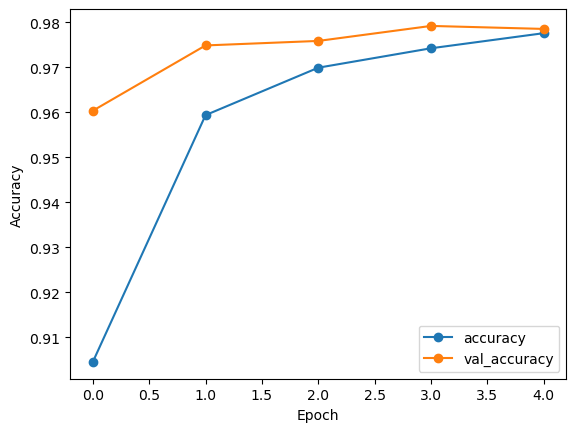

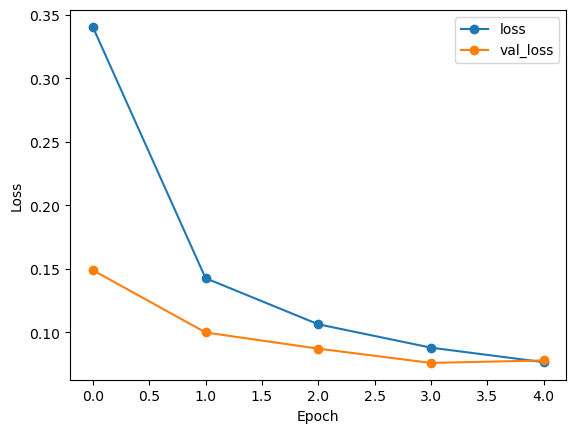

In [9]:
#plot accuracy
plt.plot(history.history['accuracy'],"-o", label='accuracy')
plt.plot(history.history['val_accuracy'],"-o", label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#plor loss
plt.plot(history.history['loss'],"-o", label='loss')
plt.plot(history.history['val_loss'],"-o", label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# plt.ylim([0, 1])